# Tron anh theo huong dan

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Watermark')

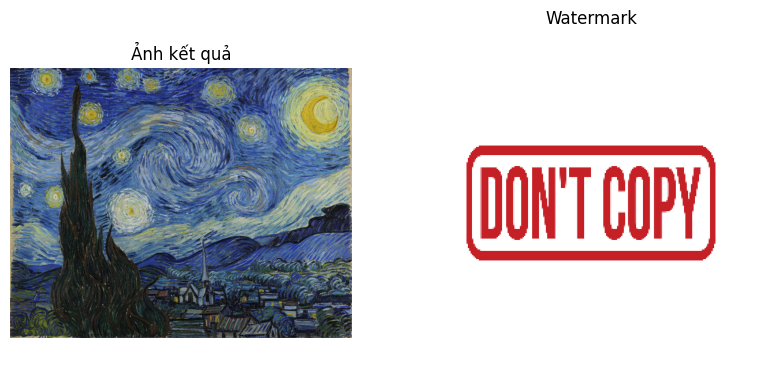

In [26]:
img_bg = cv2.imread("starry_night.jpg") 
img_logo = cv2.imread("dont-copy-rubber-stamp-seal-vector.jpg")

img_logo = cv2.resize(img_logo, (250, 250))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Ảnh kết quả")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Watermark")

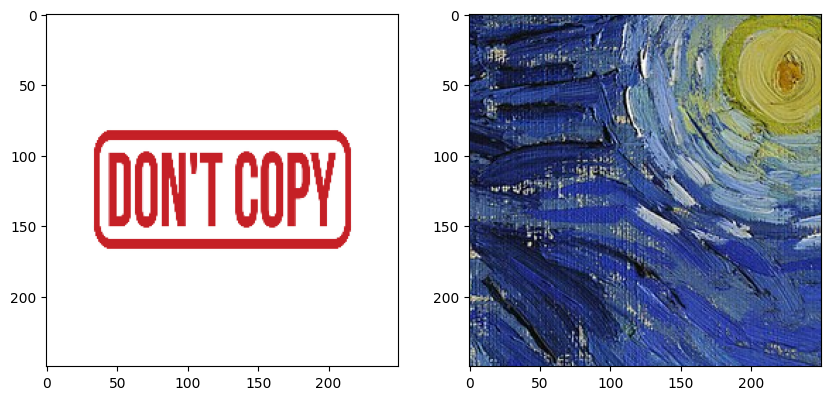

In [27]:
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)
img_logo = cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(img_logo)

x, y, w, h = 50, 50, img_logo.shape[1], img_logo.shape[0]
roi = img_bg[x:x+h, y:y+w]
plt.subplot(1, 2, 2)
plt.imshow(roi)

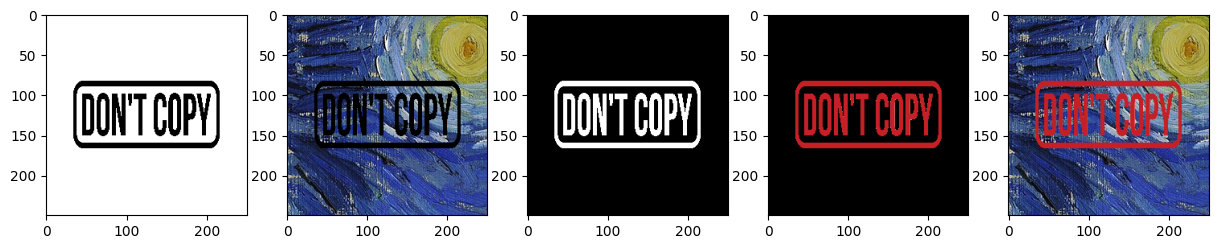

In [34]:
img_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(15, 15))
plt.subplot(1,5,1)
plt.imshow(mask, cmap="gray")

bg = cv2.bitwise_or(roi, roi, mask=mask)
plt.subplot(1,5,2)
plt.imshow(bg)

plt.subplot(1,5,3)
plt.imshow(cv2.bitwise_not(mask), cmap="gray")

fg = cv2.bitwise_and(img_logo, img_logo, mask=cv2.bitwise_not(mask))
plt.subplot(1,5,4)
plt.imshow(fg)

fn = cv2.add(fg, bg)
plt.subplot(1,5,5)
plt.imshow(fn)

# Video

In [ ]:
import cv2
import numpy as np

def add_image_watermark_to_video(input_path, output_path, watermark_path, pos=(50,50), scale=0.3, speed=1.0, bg_threshold=240):
    """
    Gắn watermark dạng ảnh (PNG hoặc JPG) lên từng frame video.

    Parameters:
        input_path (str): video đầu vào
        output_path (str): video đầu ra (.mp4)
        watermark_path (str): ảnh watermark (PNG/JPG)
        pos (tuple): tọa độ (x,y) trên video để đặt watermark
        scale (float): hệ số thu nhỏ watermark
        speed (float): tốc độ phát ( >1 nhanh hơn, <1 chậm hơn )
        bg_threshold (int): ngưỡng để coi nền là trắng (dùng cho JPG)
    """

    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print("Không mở được video!")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out_fps = fps * speed
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, out_fps, (width, height))

    # Đọc watermark
    watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)

    wm_h, wm_w = watermark.shape[:2]
    wm_h = int(wm_h * scale)
    wm_w = int(wm_w * scale)
    watermark = cv2.resize(watermark, (wm_w, wm_h))

    gray = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)
    mask = cv2.threshold(gray, bg_threshold, 255, cv2.THRESH_BINARY_INV)[1]
    mask_inv = cv2.bitwise_not(mask)
    wm_bgr = watermark

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        x, y = pos
        roi = frame[y:y+wm_h, x:x+wm_w]

        background = cv2.bitwise_and(roi, roi, mask=mask_inv)
        foreground = cv2.bitwise_and(wm_bgr, wm_bgr, mask=mask)
        combined = cv2.add(background, foreground)

        frame[y:y+wm_h, x:x+wm_w] = combined
        out.write(frame)

    cap.release()
    out.release()
    print("✅ Video đã lưu tại:", output_path)


In [ ]:
add_image_watermark_to_video(
    input_path="input_video.mp4",
    output_path="output.mp4",
    watermark_path="dont-copy-rubber-stamp-seal-vector.jpg",
    pos=(100,100),
    scale=0.4,
    speed=0.2,
    bg_threshold=240
)


✅ Video đã lưu tại: output.mp4


# Trộn ảnh

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ảnh gốc')

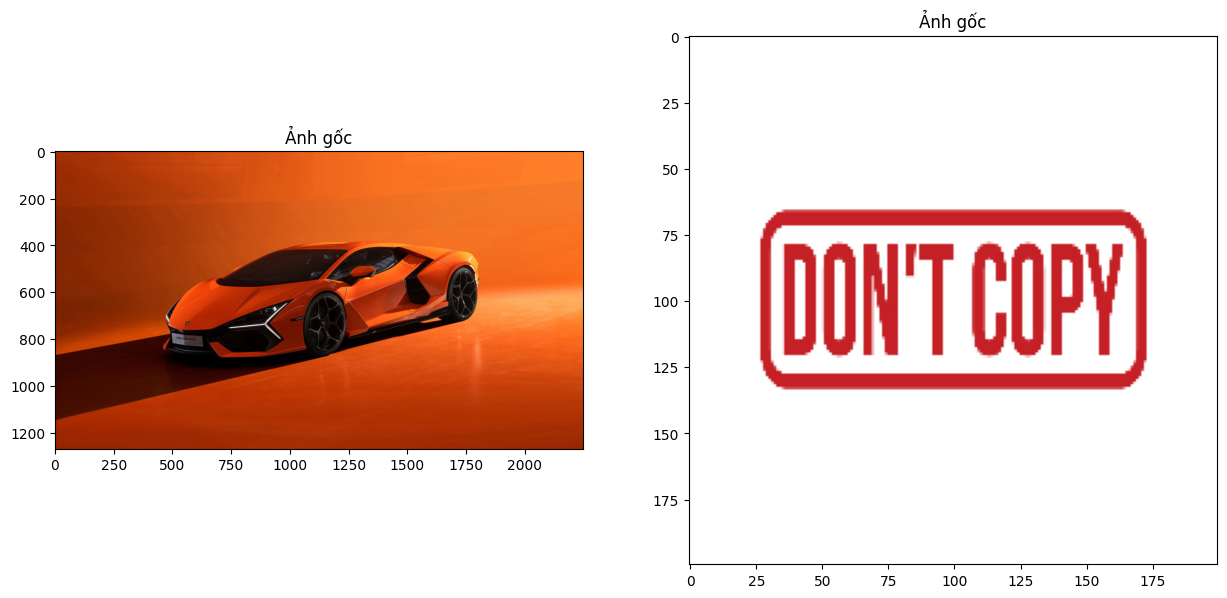

In [3]:
large_img = cv2.imread("2024-lamborghini-revuelto-127-641a1d518802b.jpg")
watermark = cv2.imread("dont-copy-rubber-stamp-seal-vector.jpg")

large_rgb = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)
small_img = cv2.resize(watermark, (200, 200))

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(large_rgb)
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(small_img)
plt.title("Ảnh gốc")

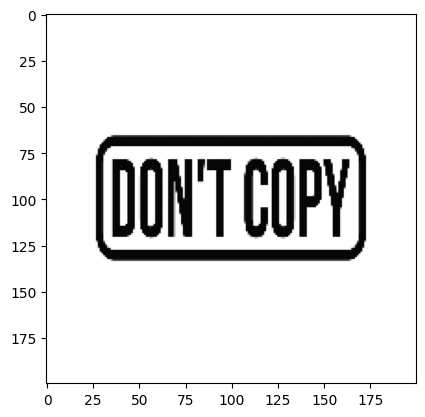

In [4]:
small_gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
plt.imshow(small_gray, cmap="gray")

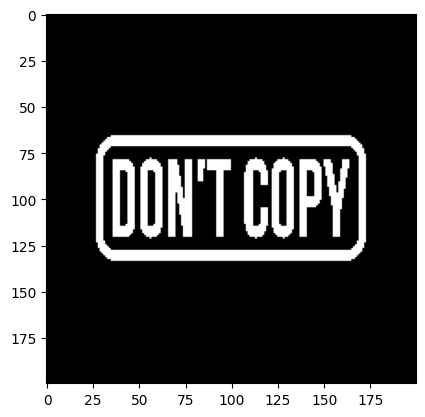

In [5]:
mask = cv2.threshold(small_gray, 200, 255, cv2.THRESH_BINARY)[1]

mask_inv = cv2.bitwise_not(mask)

plt.imshow(mask_inv, cmap="gray")

In [6]:
rows, cols = small_img.shape[:2]
x, y = 400, 300   
roi = large_img[y:y+rows, x:x+cols]

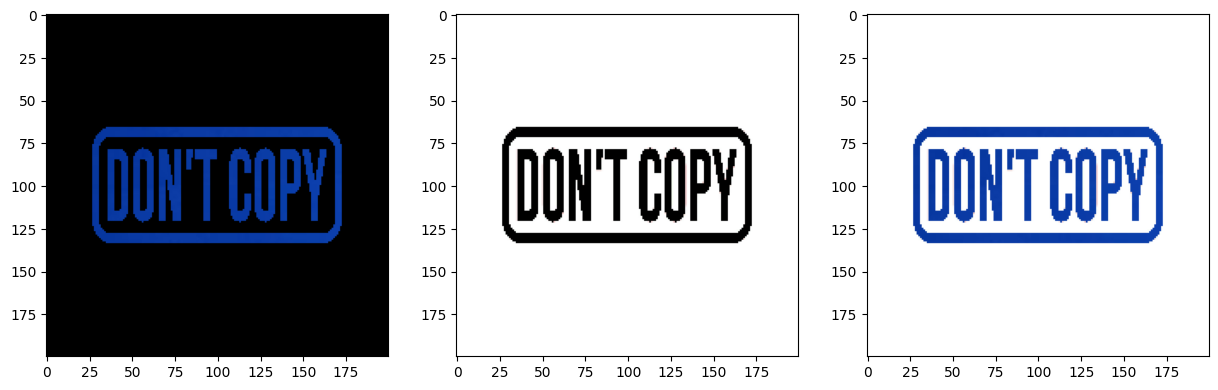

In [7]:
background = cv2.bitwise_and(roi, roi, mask=mask_inv)
foreground = cv2.bitwise_and(small_img, small_img, mask=mask)
combined = cv2.add(background, foreground)

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(background, cmap="gray")

plt.subplot(1,3,2)
plt.imshow(foreground)

plt.subplot(1,3,3)
plt.imshow(combined)

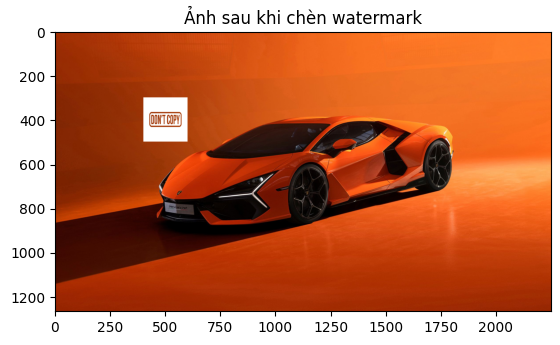

In [9]:
large_img[y:y+rows, x:x+cols] = combined

final_rgb = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
plt.imshow(final_rgb)
plt.title("Ảnh sau khi chèn watermark")
plt.show()